In [40]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [53]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/PhaseComp_test')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/EXTERNAL2/BubComp_test')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory


In [54]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [56]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/PhaseComp_test')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,44146,8168,8168,376,2596,2774,1410,14236,14058,815,0,0,0
1,0.1,5.016308,44381,7962,7867,272,2753,2547,1635,14285,14586,694,0,0,0
2,0.1,5.016308,44381,7962,7867,272,2753,2547,1635,14285,14586,694,0,0,0
3,0.2,5.016308,44857,8051,7974,275,2618,2103,1627,14331,14923,699,0,0,0
4,0.3,5.016308,44908,8243,8136,289,2632,1961,1620,14125,14903,692,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,1199.4,5.016308,37133,7381,12348,408,8622,2874,1602,8997,9778,591,0,0,0
23993,1199.5,5.016308,37431,7588,12653,419,8723,2824,1632,8689,9523,550,0,0,0
23994,1199.6,5.016308,37524,7133,11911,395,8354,2697,1582,9513,10392,624,0,0,0
23995,1199.7,5.016308,37500,7019,11766,389,8532,2865,1614,9449,10369,598,0,0,0


[[0.0, 0.0, 0.0, 0.0], [0.0, 50.0, 100.0, 150.0], [500.0, 500.0, 500.0, 500.0], [50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06]]


In [57]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,500,50.0,1.0,60.0,0.000001
1,0,50,500,50.0,1.0,60.0,0.000001
2,0,100,500,50.0,1.0,60.0,0.000001
3,0,150,500,50.0,1.0,60.0,0.000001


In [58]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,6.091231,42309,6759,6825,220,3433,3447,947,14808,14728,597,0,0,0
1,0.1,6.091231,40566,7075,7047,178,3779,3104,1023,14146,14849,563,0,0,0
2,0.2,6.091231,40987,7135,7100,173,3841,2526,1040,14024,15374,551,0,0,0
3,0.3,6.091231,41471,7050,7075,175,3840,2350,1039,14110,15575,550,0,0,0
4,0.4,6.091231,41509,7448,7462,189,3856,2424,1036,13696,15114,539,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.7,6.091231,40417,8439,8478,229,3841,2810,994,12720,13712,541,0,0,0
8,0.8,6.091231,40213,9023,9052,248,3933,2977,993,12044,12971,523,0,0,0
9,0.9,6.091231,40047,9361,9392,260,3938,2940,963,11623,12611,523,78,57,18
10,1.0,6.091231,39518,9505,9548,266,4438,3165,1005,11001,12242,474,56,45,19


6.091231
42309


In [59]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/EXTERNAL2/BubComp_test')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,edge_width,edge_width_err,NBin
0,0.0,5.016308,44146,1,1,14236,14058,94.417509,1.209226,36.323447,2.437465,815
1,0.1,5.016308,44381,1,1,14285,14586,84.685787,1.141826,34.846373,2.559151,694
2,0.1,5.016308,44381,1,1,14285,14586,84.685787,1.141826,34.846373,2.559151,694
3,0.2,5.016308,44857,1,1,14331,14923,85.083261,1.244079,34.991527,2.871898,699
4,0.3,5.016308,44908,1,1,14125,14903,85.313371,1.197252,34.021501,2.995386,692
...,...,...,...,...,...,...,...,...,...,...,...,...
24862,1199.4,5.016308,37133,1,1,8997,9778,86.545528,10.508119,24.906378,20.965183,591
24863,1199.5,5.016308,37431,1,1,8689,9523,85.531220,11.287882,23.205908,22.821133,550
24864,1199.6,5.016308,37524,1,1,9513,10392,87.617711,10.122624,26.826738,21.086675,624
24865,1199.7,5.016308,37500,1,1,9449,10369,85.970993,10.851317,25.509575,21.874900,598


[[0.0, 0.0, 0.0, 0.0], [0.0, 50.0, 100.0, 150.0], [500.0, 500.0, 500.0, 500.0], [50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0], [1e-06, 1e-06, 1e-06, 1e-06]]


In [60]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,500,50.0,1.0,60.0,0.000001
1,0,50,500,50.0,1.0,60.0,0.000001
2,0,100,500,50.0,1.0,60.0,0.000001
3,0,150,500,50.0,1.0,60.0,0.000001


In [61]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)
headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,edge_width,edge_width_err,NBin
0,0.0,6.091231,42309,1,1,14808,14728,94.440494,3.798009,39.289567,9.100469,597
1,0.1,6.091231,40566,1,1,14146,14849,89.454212,4.889410,39.587723,9.114653,563
2,0.2,6.091231,40987,1,1,14024,15374,94.977867,3.015877,46.042202,8.085215,551
3,0.3,6.091231,41471,1,1,14110,15575,88.219412,4.697189,38.987055,8.114550,550
4,0.4,6.091231,41509,1,1,13696,15114,88.474263,4.678840,37.274778,8.732430,539
...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.8,6.091231,40213,1,1,12044,12971,92.001086,6.269332,33.944449,9.646479,523
9,0.9,6.091231,40047,3,3,11623,12611,0.000000,0.000000,0.000000,0.000000,523
10,0.9,6.091231,40047,3,2,78,57,63.242204,29.445844,63.242204,29.445844,18
11,1.0,6.091231,39518,2,2,11001,12242,99.699436,29.390642,99.699436,29.390642,474


6.091231
42309


In [62]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.764#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [63]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

<ipython-input-62-f62cc3e76635>:86: RuntimeWarning: divide by zero encountered in double_scalars
  return num / den


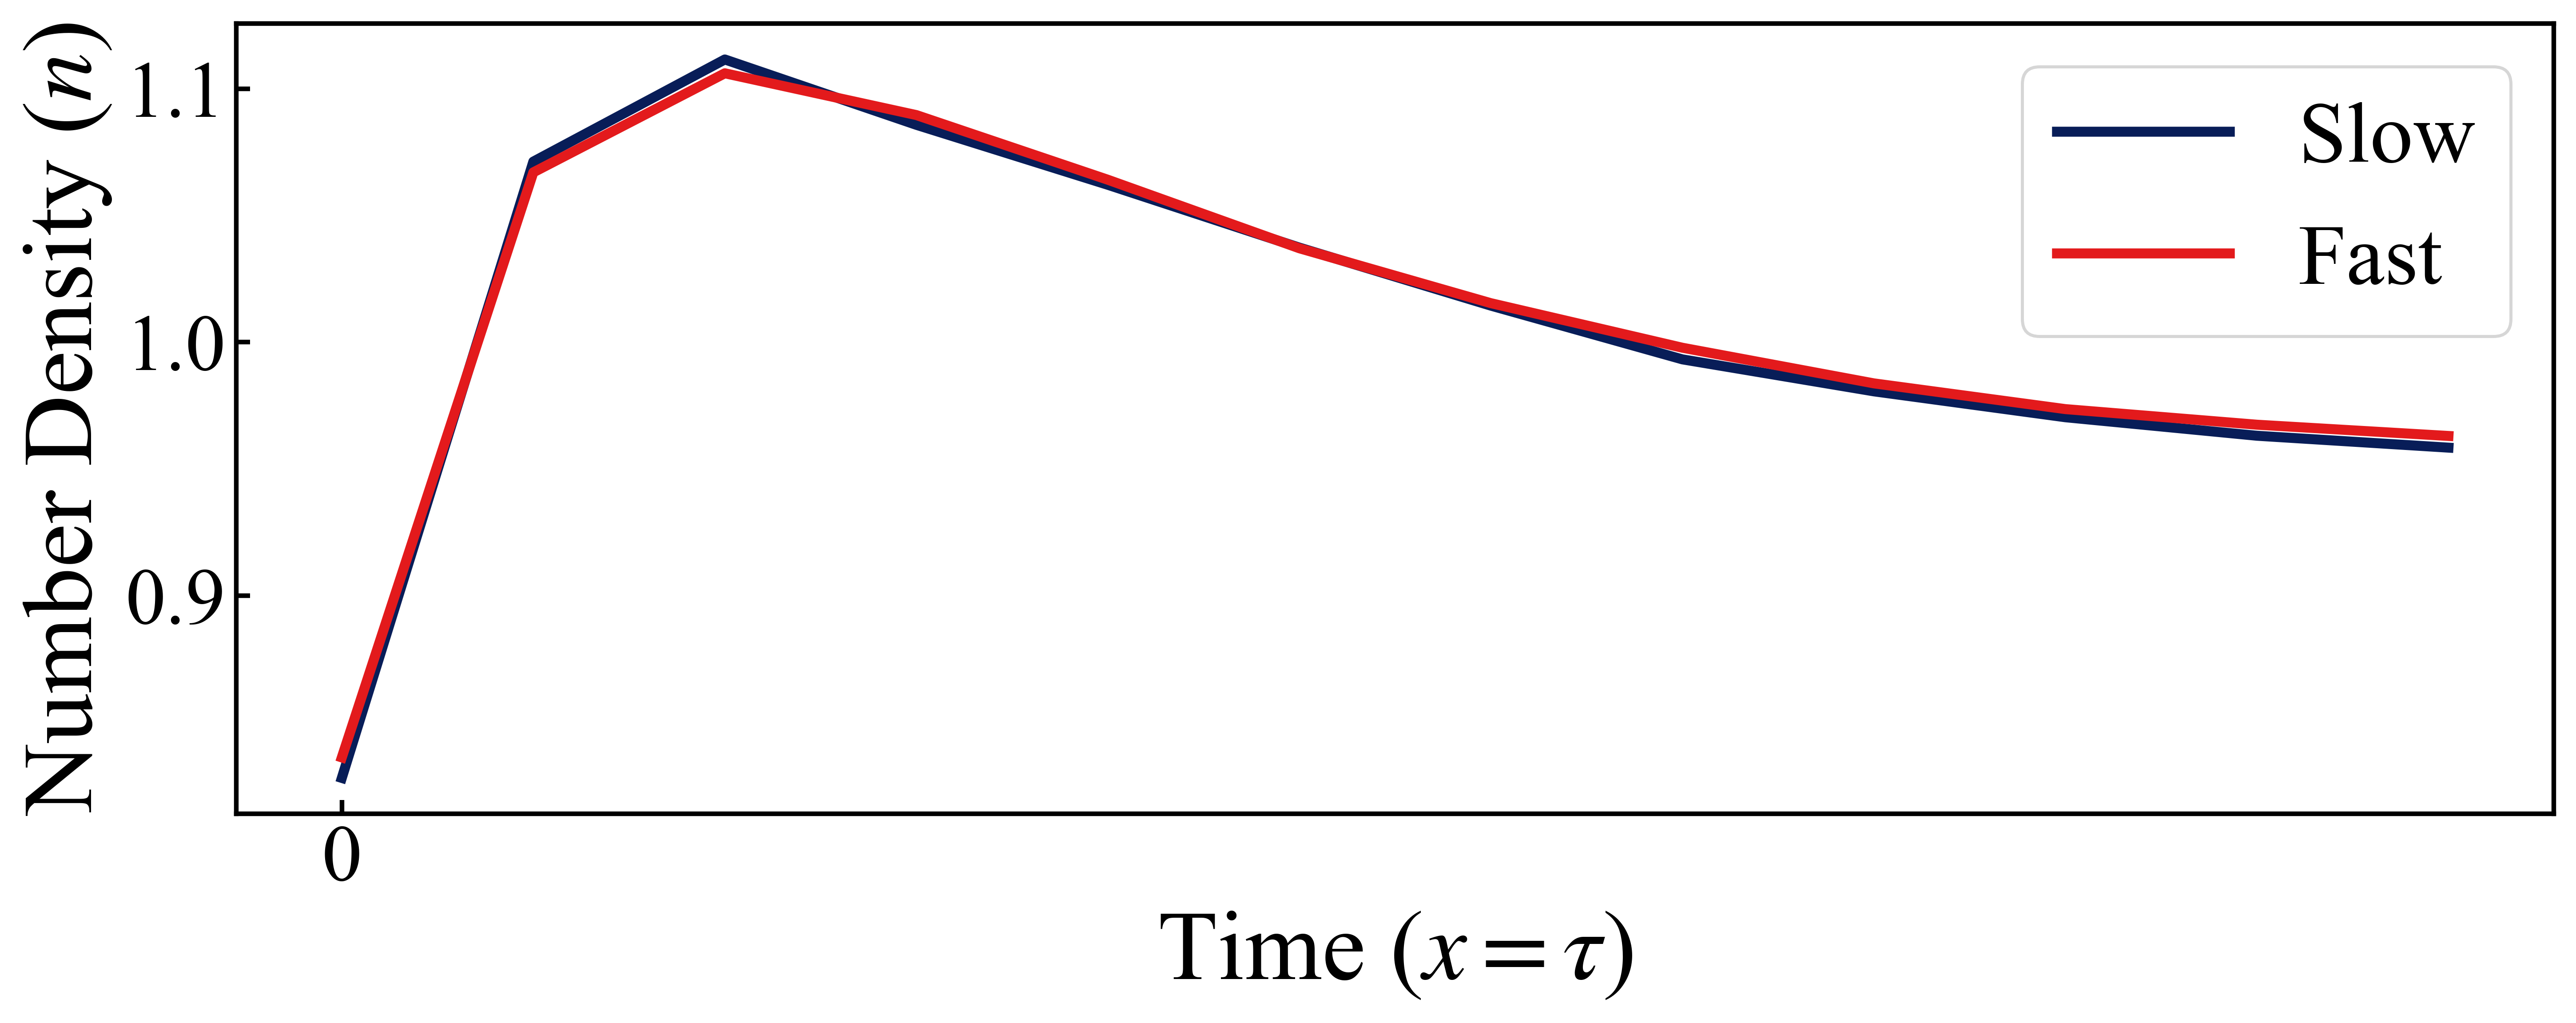

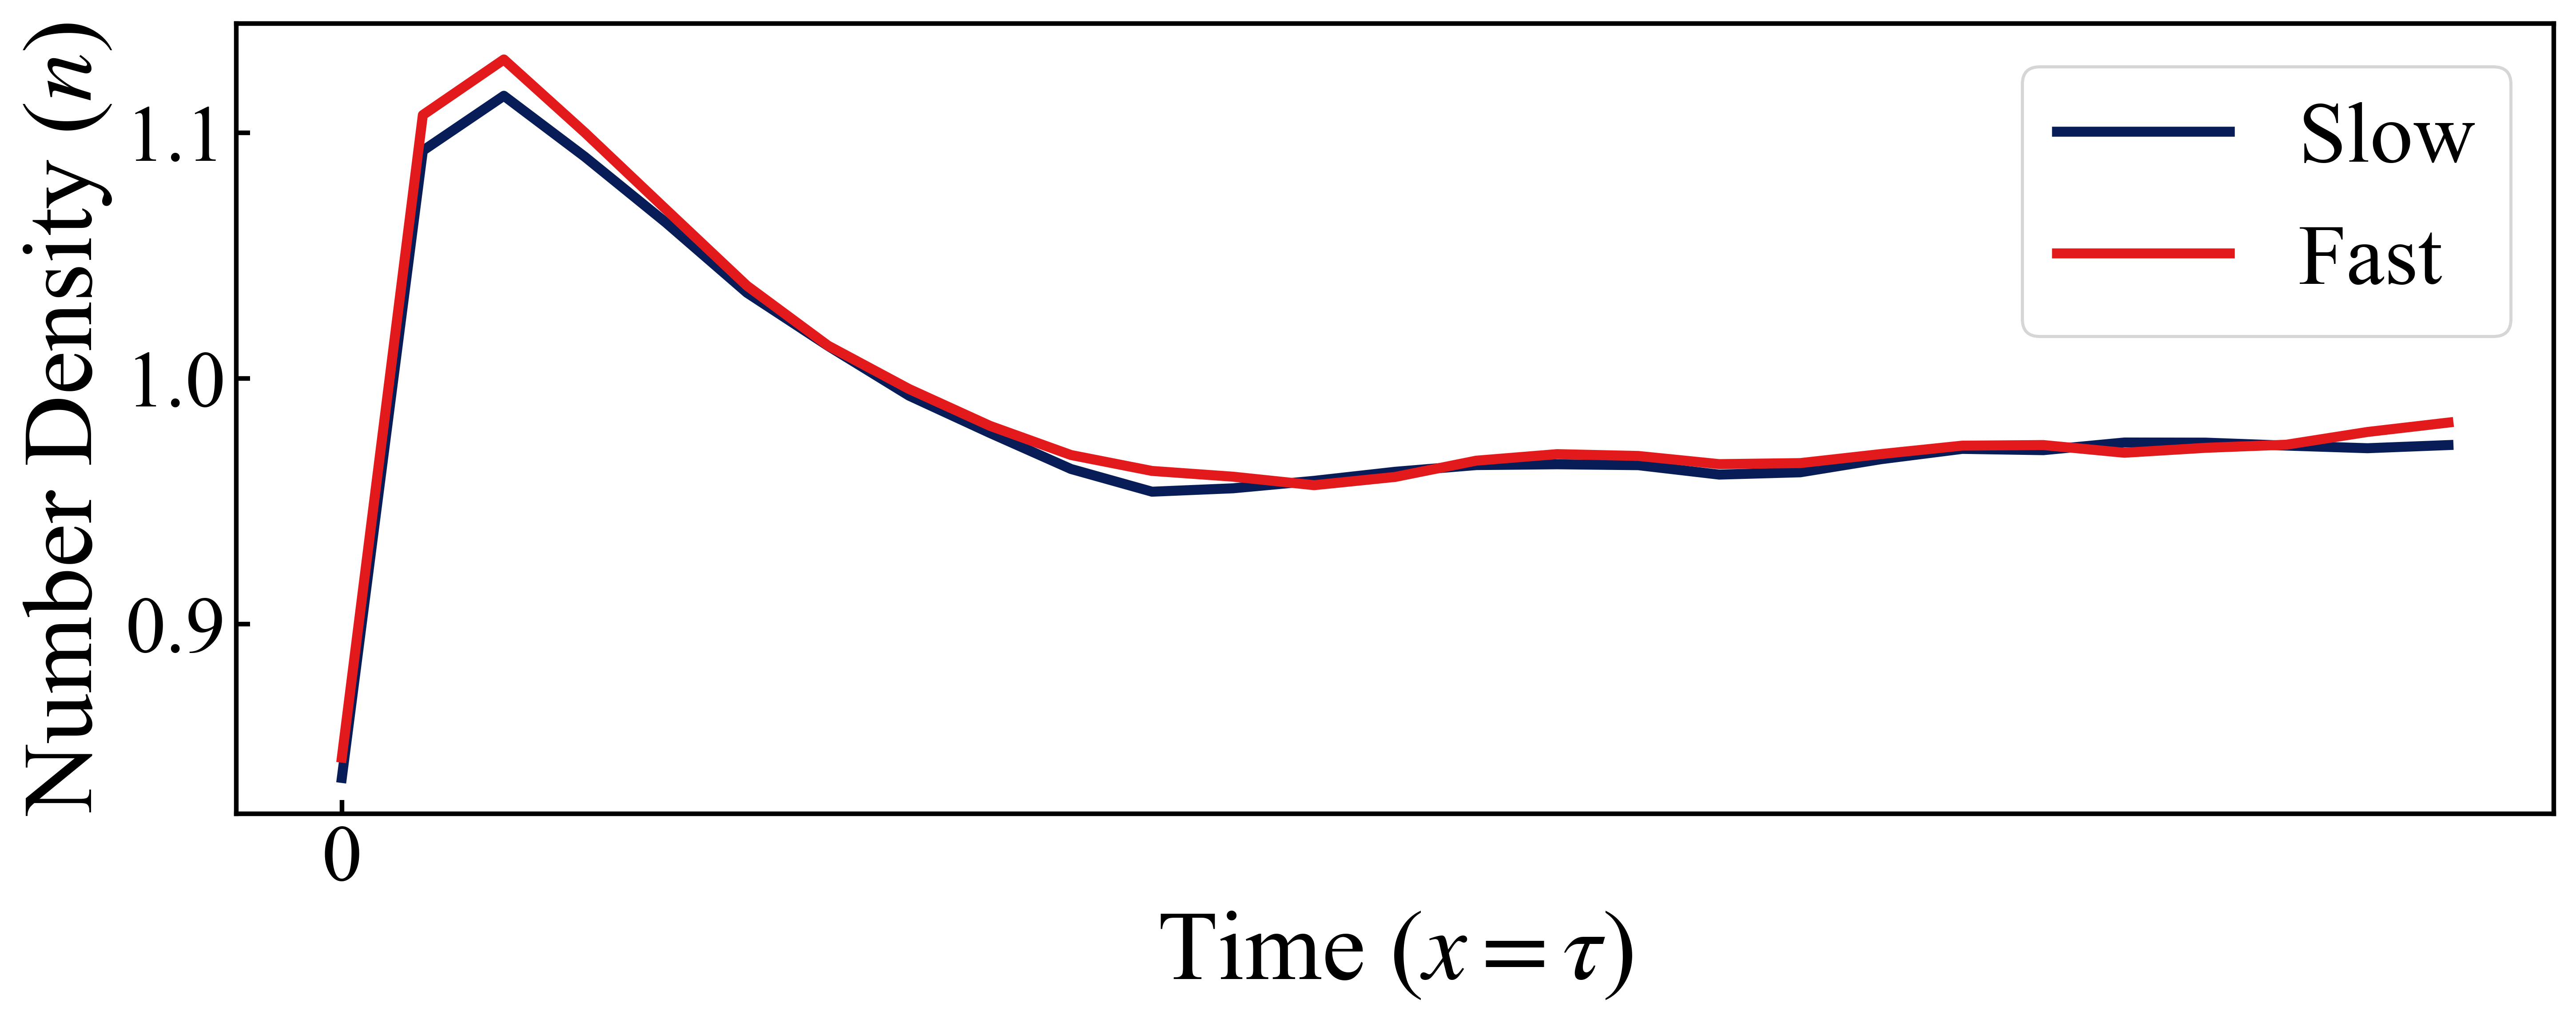

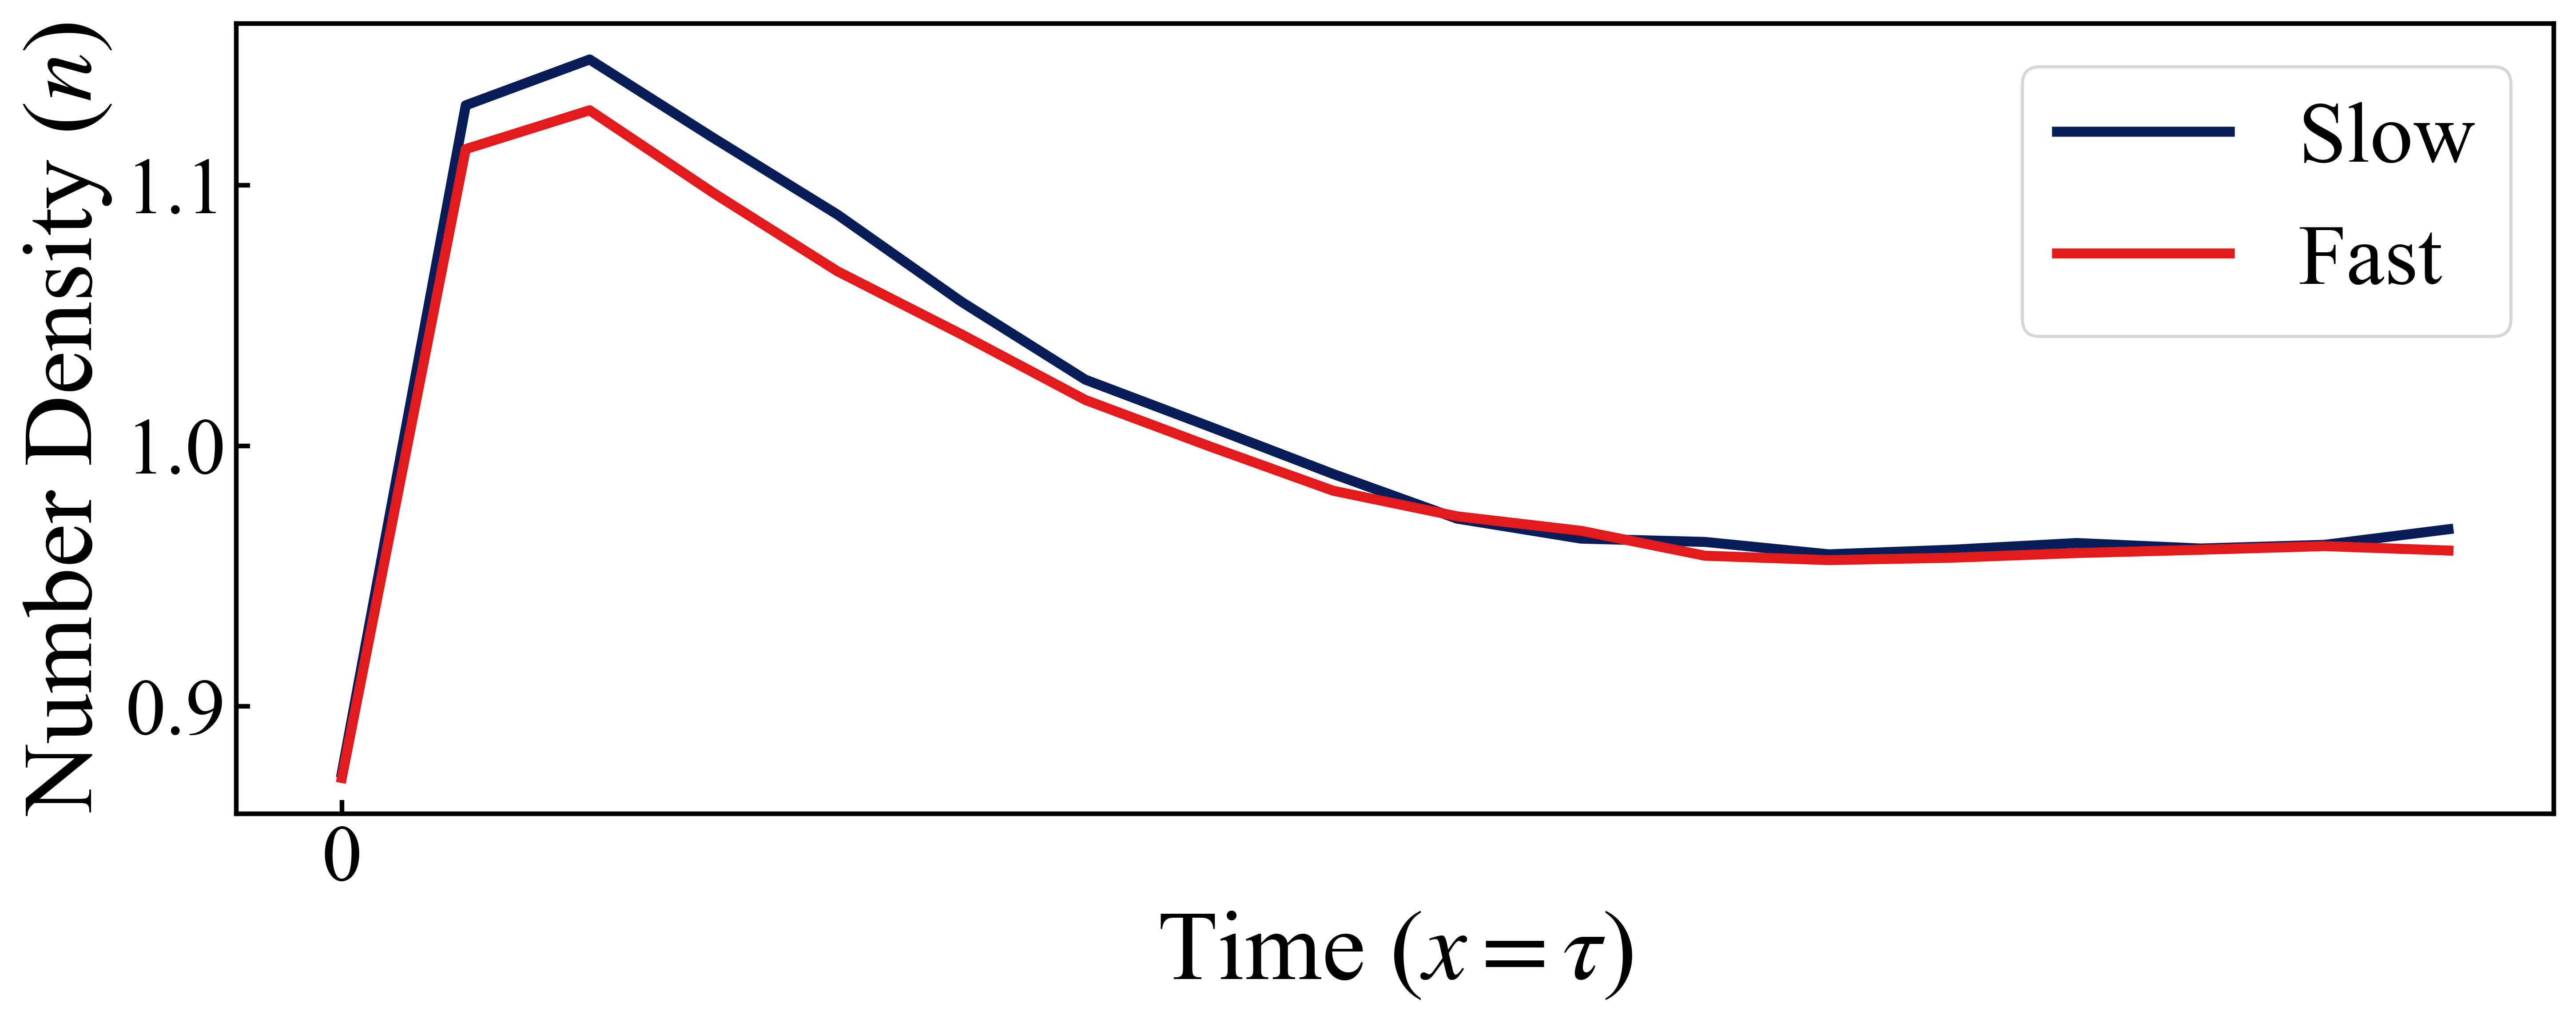

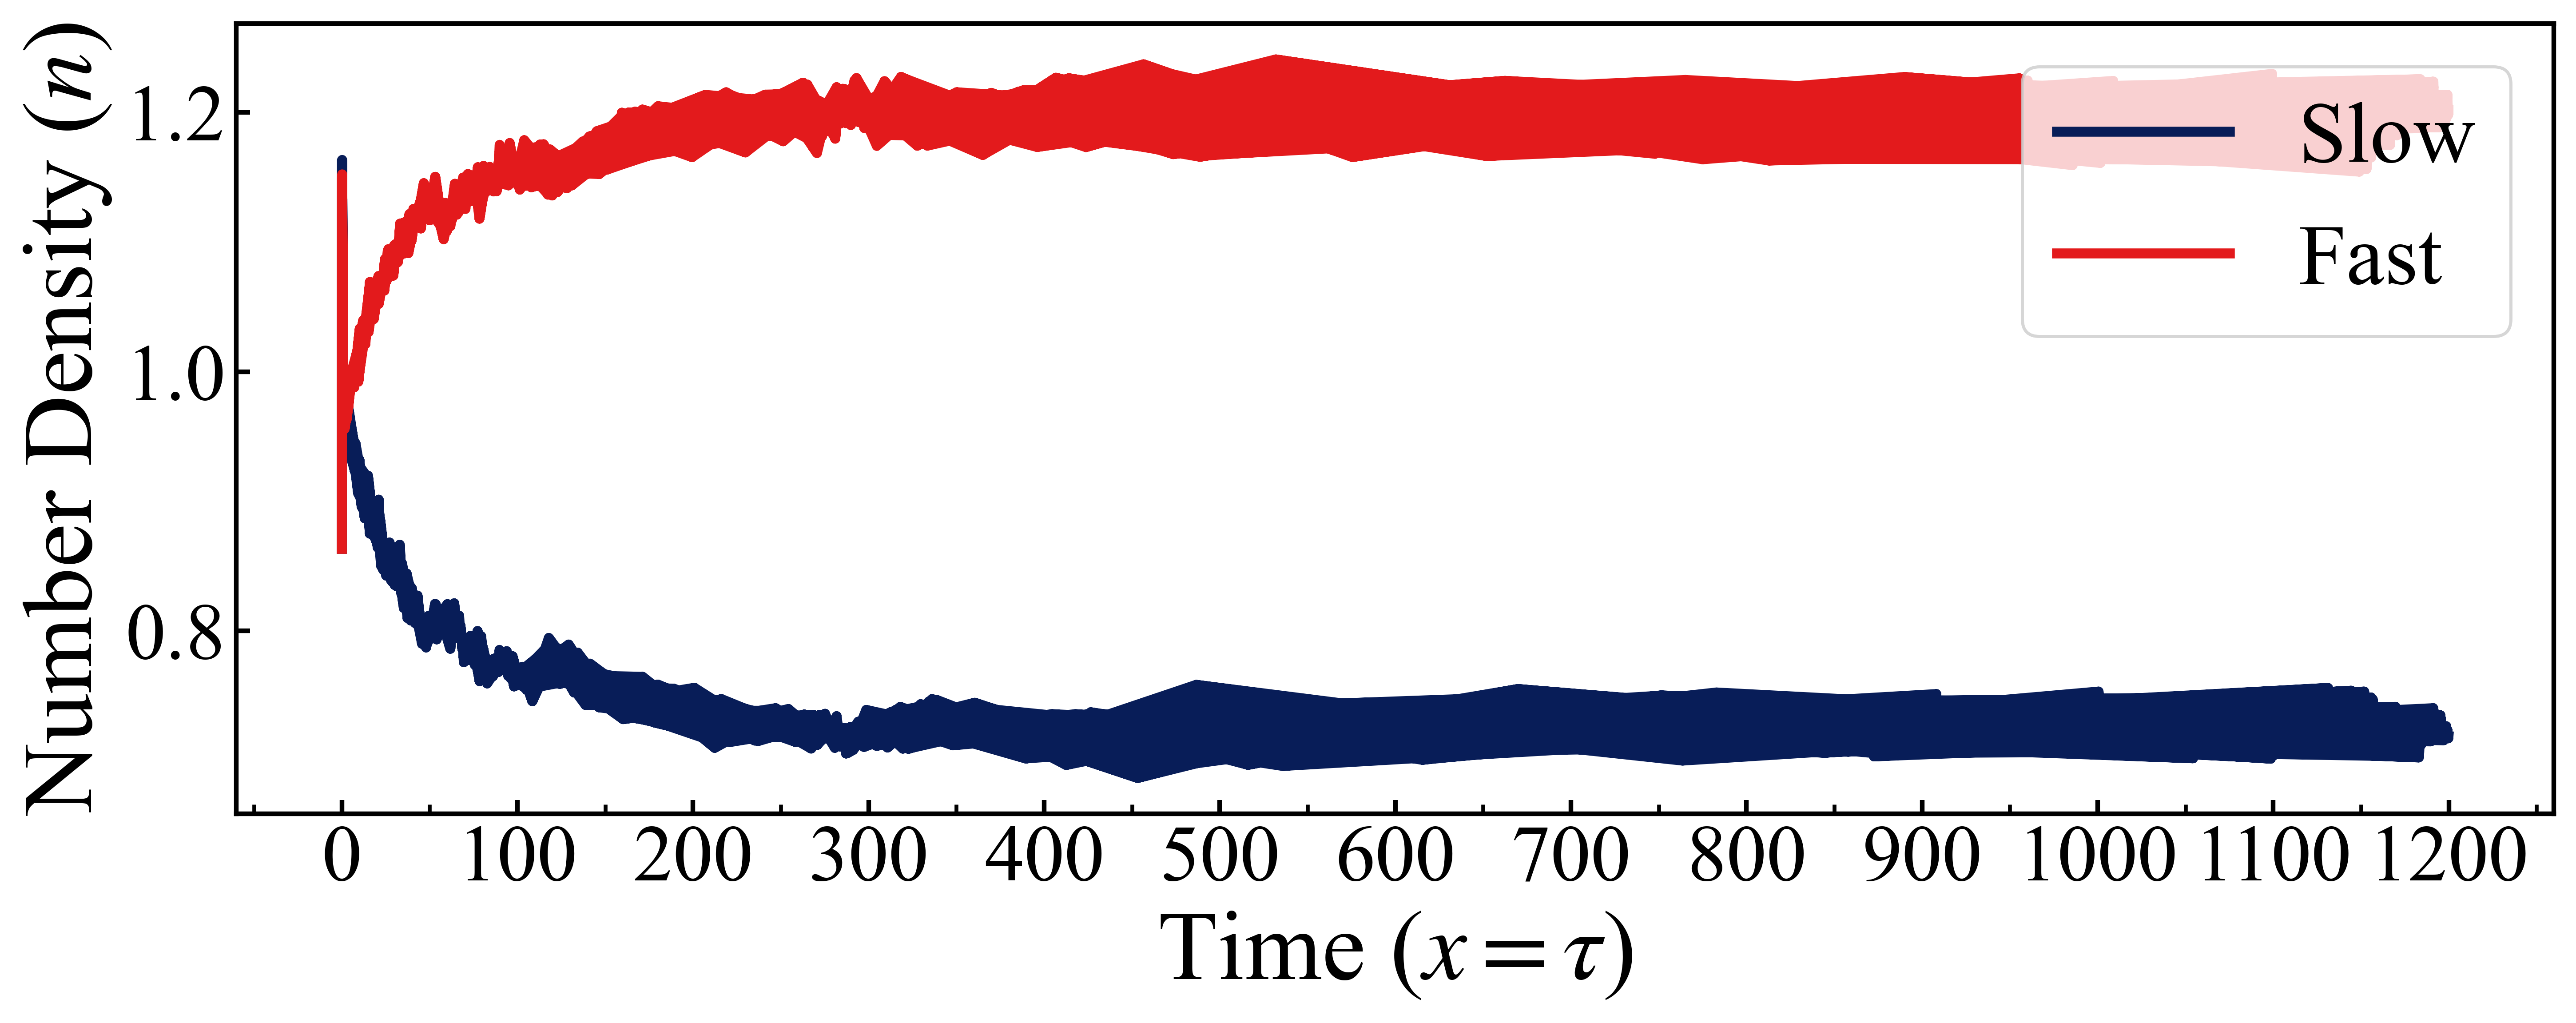

In [64]:
interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])


        
        
phase_peA=np.array([])
phase_peB=np.array([])
phase_peRat=np.array([])
phase_peDif=np.array([])
phase_peNet=np.array([])
phase_xA=np.array([])
phase_eps=np.array([])
phase_pnum=np.array([])
phase_phi=np.array([])
avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_arr = np.array([])
beta_peNet = np.array([])
avg_shear=np.array([])
bulk_lat_mean = np.array([])
beta_arr2 = np.array([])
int_lat_mean = np.array([])
all_lat_mean = np.array([])
beta_arr2_std = np.array([])

avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])

avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
beta_final_arr=np.array([])
time_arr3 = np.array([])

def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.874#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

def activityProbability(r, r_swap = [], probA = []):
    "Using similar triangles to find sides"
    if len(r_swap)>0:
        prob_rA = np.zeros(len(r))
        prob_rB = np.zeros(len(r))
        for i in range(1, len(r_swap)):
            r_min = find_nearest(r, r_swap[i-1])
            r_max = find_nearest(r, r_swap[i])
            
            prob_rA[r_min:r_max+1]=probA[i]
            prob_rB[r_min:r_max+1]=1.0-probA[i]
    else:
        prob_rA = np.ones(len(r)) * 0.5
        prob_rB = np.ones(len(r)) - prob_rA
    
    return prob_rA, prob_rB
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

press_interpart = np.array([])
press_int2 = np.array([])

beta_test_arr = np.array([])

for n in range(0, len(all_pres_new)):

    time_arr3 = np.array([])
    bulk_nA_arr = np.array([])
    bulk_nB_arr = np.array([])
    bulk_n_arr = np.array([])
    int_n_arr = np.array([])
    int_nA_arr = np.array([])
    int_nB_arr = np.array([])
    gas_nA_arr = np.array([])
    gas_nB_arr = np.array([])
    dense_nA_arr = np.array([])
    dense_nB_arr = np.array([])
    dense_n_arr = np.array([])

    for j in range(0, len(all_pres_new[n]['clust_size'])):
        bin_size = all_pres_new[n]['sizeBin'][j]
        bin_area = bin_size**2
        time_arr3 = np.append(time_arr3, all_pres_new[n]['tauB'][j])
        bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new[n]['Na_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
        bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new[n]['Nb_bulk'][j] / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
        bulk_n_arr = np.append(bulk_n_arr, (all_pres_new[n]['Nb_bulk'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * all_pres_new[n]['NBin_bulk'][j]))
        int_n_arr = np.append(int_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]) / (bin_area * all_pres_new[n]['NBin_int'][j]))
        int_nA_arr = np.append(int_nA_arr, all_pres_new[n]['Na_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
        int_nB_arr = np.append(int_nB_arr, all_pres_new[n]['Nb_int'][j] / (bin_area * all_pres_new[n]['NBin_int'][j]))
        gas_nA_arr = np.append(gas_nA_arr, all_pres_new[n]['Na_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
        gas_nB_arr = np.append(gas_nB_arr, all_pres_new[n]['Nb_gas'][j] / (bin_area * all_pres_new[n]['NBin_gas'][j]))
        dense_n_arr = np.append(dense_n_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Na_bulk'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
        dense_nA_arr = np.append(dense_nA_arr, (all_pres_new[n]['Na_int'][j]+all_pres_new[n]['Na_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))
        dense_nB_arr = np.append(dense_nB_arr, (all_pres_new[n]['Nb_int'][j]+all_pres_new[n]['Nb_bulk'][j]) / (bin_area * (all_pres_new[n]['NBin_int'][j]+all_pres_new[n]['NBin_bulk'][j])))

    
    avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
    avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
    avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
    avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))

    avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
    avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
    avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
    avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
    avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
    avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
    avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))

    phase_peA=np.append(phase_peA, params3['peA'][n])
    phase_peB=np.append(phase_peB, params3['peB'][n])
    phase_peDif=np.append(phase_peDif, params3['peB'][n]-params3['peA'][n])
    phase_peRat=np.append(phase_peRat, params3['peA'][n]/params3['peB'][n])

    phase_peNet=np.append(phase_peNet, params3['peB'][n] * (1-params3['xA'][n]/100) + params3['peA'][n] * (params3['xA'][n]/100))
    phase_xA=np.append(phase_xA, params3['xA'][n])
    phase_phi=np.append(phase_phi, params3['phi'][n])
    phase_eps=np.append(phase_eps, params3['eps'][n])

    fastCol = '#e31a1c'
    slowCol = '#081d58'
    print(phase_peA)
    print(phase_peB)
    fig, ax1 = plt.subplots(figsize=(12,5))
    plt.plot(time_arr3, bulk_nA_arr, '-', color=slowCol, label='Slow',lw=1.8*1.8)
    plt.plot(time_arr3, bulk_nB_arr, '-', color=fastCol, label='Fast',lw=1.8*1.8)

    # Set all the x ticks for radial plots
    loc = ticker.MultipleLocator(base=100)
    ax1.xaxis.set_major_locator(loc)
    loc = ticker.MultipleLocator(base=50)
    ax1.xaxis.set_minor_locator(loc)
    # Set y ticks
    #loc = ticker.MultipleLocator(base=0.5)
    #ax1.yaxis.set_major_locator(loc)
    #loc = ticker.MultipleLocator(base=0.25)
    #ax1.yaxis.set_minor_locator(loc)


    ax1.tick_params(axis='x', labelsize=26)
    ax1.tick_params(axis='y', labelsize=26)
    ax1.set_xlabel(r'Time ($x=\tau$)', fontsize=32)
    ax1.set_ylabel(r'Number Density ($n$)', fontsize=32)
    #ax1.set_ylim([-0.05,1.05])
    props = dict(boxstyle='square', facecolor='white', edgecolor='none', alpha=0.85, pad=0.1)
    #ax1.text(0.44, 0.88, r'$n(x)=(0.0023\mathrm{Pe}_\mathrm{Net}+1.0194)/(1+e^{18.8699(x-0.92902)})+(-0.000683\mathrm{Pe}_\mathrm{Net}+0.3534)$', zorder=10,
    #           transform=ax1.transAxes,
    #           fontsize=22,fontdict={'fontname':'Helvetica'}, bbox=props)  
    plt.legend(loc='upper right', fontsize=28)
    plt.tight_layout()
    plt.show()
    
